In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_1samp, ttest_ind, chi2_contingency, shapiro, spearmanr, pearsonr, wilcoxon, kruskal
import statsmodels.stats.multicomp as mc
import statsmodels.api as sm

In [2]:
df = pd.read_csv("tiktok_top_50_2023-12-03.csv")
df.head(50)

,Rank,Username,Owner,Followers(millions),Likes(billions),Description,Country
0,1,@khaby.lame,Khabane Lame,162.2,2.40,Social media personality,Italy Senegal
1,2,@charlidamelio,Charli D'Amelio,151.6,11.50,Dancer and social media personality,United States
2,3,@bellapoarch,Bella Poarch,93.4,2.30,Singer and social media personality,Philippines United States
3,4,@mrbeast,MrBeast,89.2,0.88,Social media personality,United States
4,5,@addisonre,Addison Rae,88.8,5.80,Social media personality and dancer,NaN
5,6,@kimberly.loaiza,Kimberly Loaiza,79.8,4.80,Singer and social media personality,Mexico
6,7,@zachking,Zach King,79.7,1.10,Social media personality,United States
7,8,@tiktok,TikTok,76.1,0.30,Social media platform,China
8,9,@cznburak,Burak Özdemir,74.6,1.40,Social media personality,Turkey
9,10,@willsmith,Will Smith,74.2,0.52,Actor and film producer,United States


In [3]:
# Unique values der Spalte "country" ausgeben
df['Country'].unique()

array(['Italy\xa0Senegal', 'United States',
       'Philippines \xa0United States', nan, 'Mexico', 'China', 'Turkey',
       'South Korea', 'Japan', 'Kazakhstan', 'Colombia', 'Canada',
       'Indonesia', 'India', 'Russia', 'Philippines', 'France',
       'United Kingdom', 'Netherlands'], dtype=object)

In [4]:
# Korrektur der Spalte "country"
df['Country'] = df['Country'].fillna('') + df['Description'].apply(lambda x: x.split()[-1] if x.split()[-1] in ['Italy', 'United States', 'Philippines', 'China', 'Turkey', 'Mexico', 'Japan', 'Kazakhstan', 'Colombia', 'Indonesia', 'India', 'Russia', 'France', 'South Korea', 'United Kingdom', 'Netherlands', 'Germany'] else '')
df['Description'] = df['Description'].apply(lambda x: ' '.join(x.split()[:-1]) if x.split()[-1] in ['Italy', 'United States', 'Philippines', 'China', 'Turkey', 'Mexico', 'Japan', 'Kazakhstan', 'Colombia', 'Indonesia', 'India', 'Russia', 'France', 'South Korea', 'United Kingdom', 'Netherlands', 'Germany'] else x)

# Erstellen Sie eine Zuordnung von Benutzernamen, um Länder zu korrigieren oder hinzuzufügen
country_corrections = {
    '@bellapoarch': 'United States',
    '@joealbanese': 'United States',
    '@avani': 'United States',
    '@addisonre': 'United States',
    '@therock': 'United States',
    '@jasonderulo': 'United States',
    '@dixiedamelio': 'United States',
    '@kyliejenner': 'United States',
    '@lorengray': 'United States'
}

# Anwendung der Korrekturen
df['Country'] = df.apply(lambda row: country_corrections.get(row['Username'], row['Country']), axis=1)

In [5]:
df.head(50)

,Rank,Username,Owner,Followers(millions),Likes(billions),Description,Country
0,1,@khaby.lame,Khabane Lame,162.2,2.40,Social media personality,Italy Senegal
1,2,@charlidamelio,Charli D'Amelio,151.6,11.50,Dancer and social media personality,United States
2,3,@bellapoarch,Bella Poarch,93.4,2.30,Singer and social media personality,United States
3,4,@mrbeast,MrBeast,89.2,0.88,Social media personality,United States
4,5,@addisonre,Addison Rae,88.8,5.80,Social media personality and dancer,United States
5,6,@kimberly.loaiza,Kimberly Loaiza,79.8,4.80,Singer and social media personality,Mexico
6,7,@zachking,Zach King,79.7,1.10,Social media personality,United States
7,8,@tiktok,TikTok,76.1,0.30,Social media platform,China
8,9,@cznburak,Burak Özdemir,74.6,1.40,Social media personality,Turkey
9,10,@willsmith,Will Smith,74.2,0.52,Actor and film producer,United States


In [7]:
gender_map = {
    '@khaby.lame': 'Male',
    '@charlidamelio': 'Female',
    '@bellapoarch': 'Female',
    '@mrbeast': 'Male',
    '@addisonre': 'Female',
    '@kimberly.loaiza': 'Female',
    '@zachking': 'Male',
    '@tiktok': 'Unknown',  # Firmenkonto, nicht anwendbar
    '@cznburak': 'Male',
    '@willsmith': 'Male',
    '@therock': 'Male',
    '@domelipa': 'Female',
    '@bts_official_bighit': 'Male',
    '@selenagomez': 'Female',
    '@jasonderulo': 'Male',
    '@dixiedamelio': 'Female',
    '@ox_zung': 'Male',
    '@spencerx': 'Male',
    '@kyliejenner': 'Female',
    '@lorengray': 'Female',
    '@bayashi.tiktok': 'Male',  
    '@youneszarou': 'Male',
    '@justmaiko': 'Male',
    '@homm9k': 'Male',
    '@billieeilish': 'Female',
    '@karolg': 'Female',
    '@kallmekris': 'Female',
    '@brentrivera': 'Male',
    '@bp_tiktok': 'Female', 
    '@williesalim': 'Male',
    '@riyaz.14': 'Male',
    '@itsjojosiwa': 'Female',
    '@carlosferiag': 'Male',
    '@joealbanese': 'Male',
    '@junya1gou': 'Male',  
    '@pongamoslo_a_prueba': 'Male',  
    '@avani': 'Female',
    '@elrodcontreras': 'Male',
    '@riaricis': 'Female',
    '@xoteam': 'Diverse', # Gruppenkonto, geschlechtsspezifisch
    '@nianaguerrero': 'Female',
    '@vilmeijuga': 'Female',  
    '@psg': 'Unknown',  # Fußballverein, nicht zutreffend
    '@anokhinalz': 'Female',
    '@roses_are_rosie': 'Female',
    '@gordonramsayofficial': 'Male',
    '@montpantoja': 'Female',
    '@dobretwins': 'Male',  
    '@shakira': 'Female',
    '@scottsreality': 'Male'
}


In [8]:
df['Gender'] = df['Username'].map(gender_map)

In [9]:
continent_map = {
    'Italy': 'Europe',
    'Italy\xa0Senegal': 'Europe',
    'Senegal': 'Africa',
    'United States': 'North America',
    'Philippines': 'Asia',
    'Philippines \xa0United States': 'Asia',
    'Mexico': 'North America',
    'China': 'Asia',
    'Turkey': 'Asia',
    'South Korea': 'Asia',
    'Japan': 'Asia',
    'Kazakhstan': 'Asia', 
    'Colombia': 'South America',
    'Canada': 'North America',
    'Indonesia': 'Asia',
    'India': 'Asia',
    'Russia': 'Europe', 
    'France': 'Europe',
    'United Kingdom': 'Europe',
    'Netherlands': 'Europe',
    'Germany': 'Europe',  
    'Unknown': 'Unknown', 
    'NaN': 'Unknown' 
}


In [10]:
df['Continent'] = df['Country'].map(continent_map)

In [11]:
df.head(5)

,Rank,Username,Owner,Followers(millions),Likes(billions),Description,Country,Gender,Continent
0,1,@khaby.lame,Khabane Lame,162.2,2.40,Social media personality,Italy Senegal,Male,Europe
1,2,@charlidamelio,Charli D'Amelio,151.6,11.50,Dancer and social media personality,United States,Female,North America
2,3,@bellapoarch,Bella Poarch,93.4,2.30,Singer and social media personality,United States,Female,North America
3,4,@mrbeast,MrBeast,89.2,0.88,Social media personality,United States,Male,North America
4,5,@addisonre,Addison Rae,88.8,5.80,Social media personality and dancer,United States,Female,North America
5,6,@kimberly.loaiza,Kimberly Loaiza,79.8,4.80,Singer and social media personality,Mexico,Female,North America
6,7,@zachking,Zach King,79.7,1.10,Social media personality,United States,Male,North America
7,8,@tiktok,TikTok,76.1,0.30,Social media platform,China,Unknown,Asia
8,9,@cznburak,Burak Özdemir,74.6,1.40,Social media personality,Turkey,Male,Asia
9,10,@willsmith,Will Smith,74.2,0.52,Actor and film producer,United States,Male,North America


## ANOVA

In [12]:
df = df.dropna(subset=['Continent'])  # Dropping rows with NaN in the Continent

# Group data by 'Continent'
groups = df.groupby('Country')['Followers(millions)'].apply(list)

# Perform ANOVA
f_value, p_value = stats.f_oneway(*groups)

# Print the results
print('ANOVA results: F-value =', f_value, ', P-value =', p_value)

ANOVA results: F-value = 2.075115682375249 , P-value = 0.03657869196752127


<Figure size 1000x600 with 0 Axes>

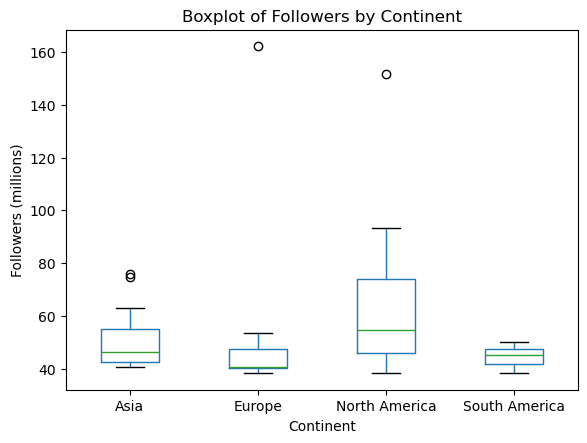

In [13]:
# Create boxplots for each continent
plt.figure(figsize=(10, 6))
df.boxplot(column='Followers(millions)', by='Continent', grid=False)

# Adding plot labels and title
plt.title('Boxplot of Followers by Continent')
plt.suptitle('')  # Remove the automatic title to clean up the plot display
plt.xlabel('Continent')
plt.ylabel('Followers (millions)')

# Show the plot
plt.show()

## Kontingenzanalyse

In [14]:
# Kreuztabelle erstellen
contingency_table = pd.crosstab(df['Gender'], df['Continent'])

# Chi-Quadrat-Test durchführen
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Ergebnisse ausgeben
print("Chi2 Statistik:", chi2)
print("P-Wert:", p)
print("Freiheitsgrade:", dof)
print("Erwartete Häufigkeiten:\n", pd.DataFrame(expected, columns=contingency_table.columns, index=contingency_table.index))

# Kreuztabelle ausgeben
print("\nKreuztabelle:")
print(contingency_table)

Chi2 Statistik: 12.504162504162503
P-Wert: 0.1863552474066629
Freiheitsgrade: 9
Erwartete Häufigkeiten:
 Continent  Asia  Europe  North America  South America
Gender                                               
Diverse    0.28    0.14           0.52           0.06
Female     6.16    3.08          11.44           1.32
Male       7.00    3.50          13.00           1.50
Unknown    0.56    0.28           1.04           0.12

Kreuztabelle:
Continent  Asia  Europe  North America  South America
Gender                                               
Diverse       0       1              0              0
Female        5       1             14              2
Male          8       4             12              1
Unknown       1       1              0              0


## Einfache lineare Regression

In [15]:
# Aufbereitung der Daten für die Regression
X = df['Followers(millions)']  # Prädiktor
Y = df['Likes(billions)']  # Antwort

# Hinzufügen einer Konstante (Achsenabschnitt) zu dem Modell
X = sm.add_constant(X)

# Fitten des Regressionsmodells
model = sm.OLS(Y, X).fit()

# Zusammenfassung der Regression abrufen
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Likes(billions)   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     24.22
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           1.05e-05
Time:                        23:54:35   Log-Likelihood:                -90.169
No. Observations:                  50   AIC:                             184.3
Df Residuals:                      48   BIC:                             188.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.6722    

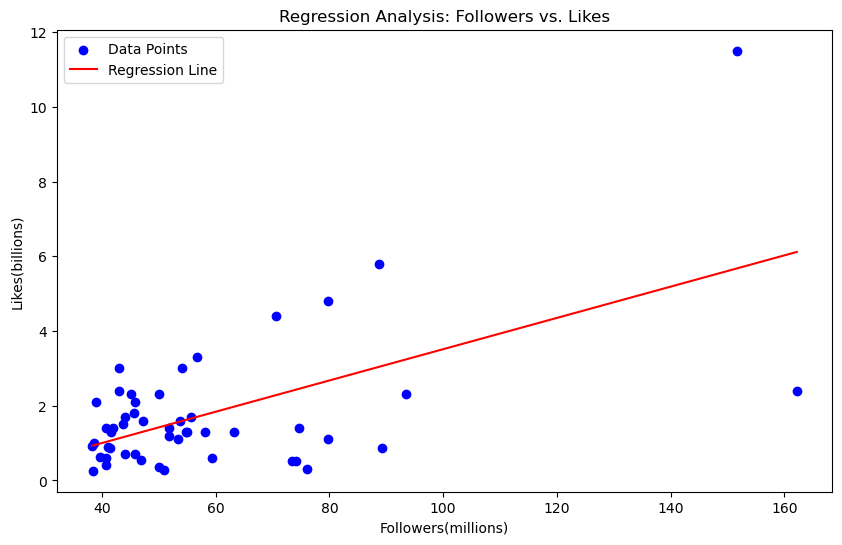

In [17]:
# Plotten des Streudiagramms
plt.figure(figsize=(10, 6))
plt.scatter(df['Followers(millions)'], df['Likes(billions)'], color='blue', label='Data Points')

# Vorhersage von Werten mit Hilfe des Modells zur Darstellung der Regressionslinie
predictions = model.predict(X)  

# Plotten der Regressionslinie
plt.plot(df['Followers(millions)'], predictions, color='red', label='Regression Line')

# Hinzufügen von Diagrammbeschriftungen und Titeln
plt.title('Regression Analysis: Followers vs. Likes')
plt.xlabel('Followers(millions)')
plt.ylabel('Likes(billions)')
plt.legend()

# Plot zeigen
plt.show()

### Ausblick

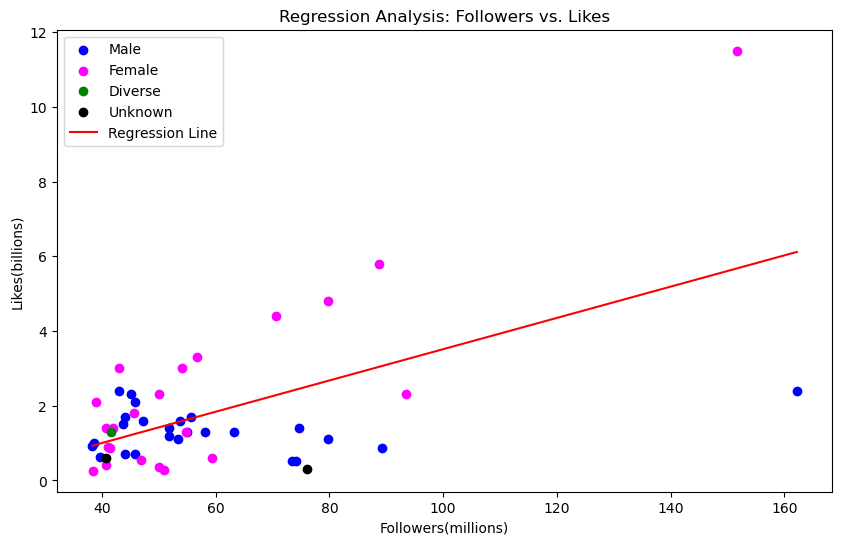

In [20]:
# Farbzuordnung für Geschlecht
gender_colors = {
    'Male': 'blue',
    'Female': 'magenta',
    'Diverse': 'green',
    'Unknown': 'black',
}

# Aufzeichnung des nach Geschlecht gefärbten Streudiagramms
plt.figure(figsize=(10, 6))
for gender, color in gender_colors.items():
    subset = df[df['Gender'] == gender]
    plt.scatter(subset['Followers(millions)'], subset['Likes(billions)'], color=color, label=f'{gender}')

# Vorhersage von Werten mit Hilfe des Modells zur Darstellung der Regressionslinie
predictions = model.predict(X) 

# Plotten der Regressionslinie
plt.plot(df['Followers(millions)'], predictions, color='red', label='Regression Line')

# Hinzufügen von Diagrammbeschriftungen und Titeln
plt.title('Regression Analysis: Followers vs. Likes')
plt.xlabel('Followers(millions)')
plt.ylabel('Likes(billions)')
plt.legend()

# Plot zeigen
plt.show()

Regression Summary for Male:
                            OLS Regression Results                            
Dep. Variable:        Likes(billions)   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.7897
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.383
Time:                        00:06:27   Log-Likelihood:                -19.970
No. Observations:                  25   AIC:                             43.94
Df Residuals:                      23   BIC:                             46.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const

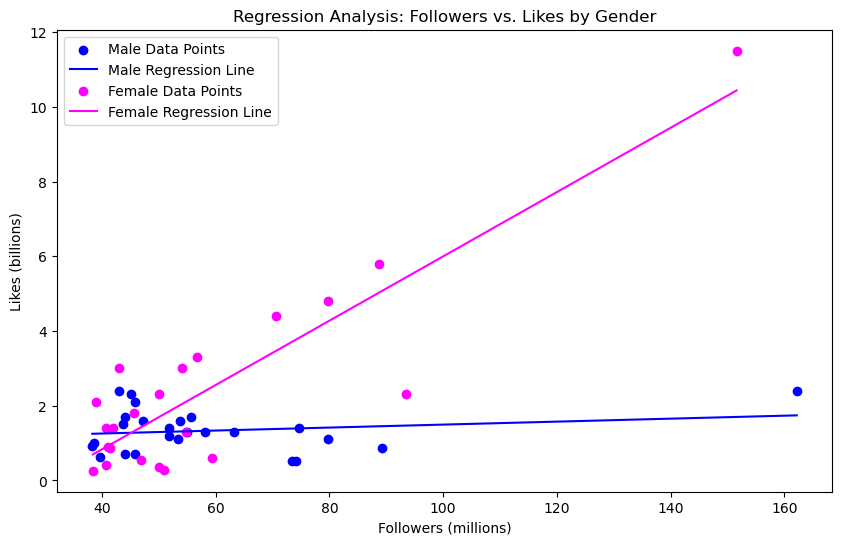

In [22]:
# Daten filtern, um 'Diverse' und 'Unknown' auszuschließen
df = df[df['Gender'].isin(['Male', 'Female'])]

# Farbzuordnung für Geschlecht
gender_colors = {
    'Male': 'blue',
    'Female': 'magenta',
}

# Plot initialisieren
plt.figure(figsize=(10, 6))

# Regressionsmodelle für jedes Geschlecht anpassen
for gender, color in gender_colors.items():
    # Daten für das aktuelle Geschlecht filtern
    subset = df[df['Gender'] == gender]
    
    # Aufbereitung der Daten für die Regression
    X = subset['Followers(millions)']  # Prädiktor
    Y = subset['Likes(billions)']  # Antwort
    X = sm.add_constant(X)  # Hinzufügen einer Konstante (Achsenabschnitt)
    
    # Fitten des Regressionsmodells
    model = sm.OLS(Y, X).fit()
    
    # Vorhersagen für die Linie machen
    predictions = model.predict(X)
    
    # Streupunkte plotten
    plt.scatter(subset['Followers(millions)'], subset['Likes(billions)'], color=color, label=f'{gender} Data Points')
    
    # Regressionslinie plotten
    plt.plot(subset['Followers(millions)'], predictions, color=color, label=f'{gender} Regression Line')

    # Ergebnisse der Regression ausgeben
    print(f'Regression Summary for {gender}:')
    print(model.summary())

# Plot-Labels und Titel hinzufügen
plt.title('Regression Analysis: Followers vs. Likes by Gender')
plt.xlabel('Followers (millions)')
plt.ylabel('Likes (billions)')
plt.legend()

# Plot anzeigen
plt.show()